### Normal Equations Method

In linear regression, we said that the goal is to find the optimal parameters $\theta$ that minimize the cost function $J(\theta)$. While we previously discussed Gradient Descent, an iterative optimization technique to achieve this goal, there is an alternative approach that allows us to compute the optimal parameters directly, without iteration. This approach is called the **Normal Equations**.

The Normal Equations method provides a closed-form solution for $\theta$. By setting the gradient of the cost function $J(\theta)$ to zero and solving the resulting system of equations, we can explicitly compute the optimal parameter values. The final formula for the Normal Equations is:

$$
\hat{\theta} = (X^T X)^{-1} X^T y
$$

where:
- $ X $ is the matrix of input features (including the bias term),
- $ y $ is the vector of target values,
- $ \hat{\theta} $ is the vector of computed optimal parameters.

This method is efficient for smaller datasets, but can be **computationally expensive** for large datasets due to the matrix inversion step. 

Nonetheless, when applicable ($ X^T X $ must be invertible), the Normal Equations provide an **exact solution** without the need for iterative optimization techniques like Gradient Descent.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
house = pd.read_csv('./datasets/houses.csv')

print(house.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [36]:
house = house.sample(frac=1, random_state=123).reset_index(drop=True)

x = house[['GrLivArea','LotArea','GarageArea','FullBath']].values

y = house['SalePrice'].values

In [37]:
train_index = round(0.8 * len(x))

x_train = x[:train_index]
y_train = y[:train_index]
x_test = x[train_index:]
y_test = y[train_index:]

In [38]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [39]:
x_train = np.c_[np.ones(x_train.shape[0]), x_train]
x_test = np.c_[np.ones(x_test.shape[0]), x_test]

In [40]:
# compute theta following the normal equation formula
# θ^ =(X^T X)^(-1) * X^T * y

theta = np.dot(np.dot(np.linalg.inv(np.dot(x_train.T, x_train)), x_train.T), y_train)

In [41]:
# estimate values on the test set
y_test_hat = np.dot(x_test, theta)

In [43]:
# Some performance metrics
mean_absolute_error = np.average(np.abs(y_test_hat - y_test))
mean_squared_error= np.average((y_test_hat - y_test)**2)
root_mean_squared_error = np.sqrt(mean_squared_error)

total_deviation = np.sum ((y_test - y_test.mean())**2)
residual_deviation = np.sum((y_test_hat-y_test)**2)
r2 = 1-(residual_deviation/total_deviation)

print(f'mae: {mean_absolute_error}; ', f'mse: {mean_squared_error}; ', f'rmse: {root_mean_squared_error}; ', f'r2: {r2}')

mae: 32591.312473218873;  mse: 2749587863.43825;  rmse: 52436.51269333469;  r2: 0.5696131007768266


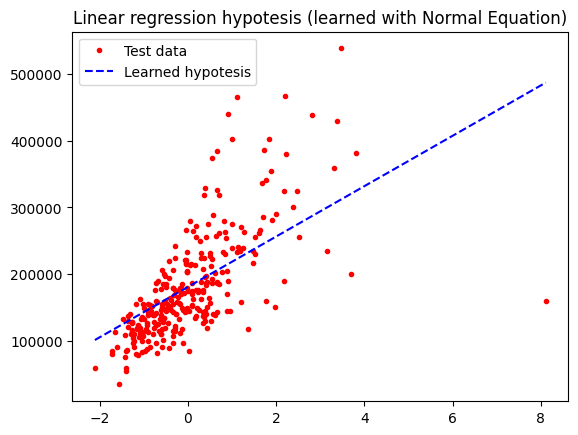

In [44]:
lineX = np.linspace(x_test[:, 1].min(), x_test[:, 1].max(), 100)
liney = [theta[0] + theta[1]*xx for xx in lineX]

plt.plot(x_test[:, 1], y_test, 'r.', label='Test data')
plt.plot(lineX, liney, 'b--', label='Learned hypotesis')
plt.title("Linear regression hypotesis (learned with Normal Equation)")
plt.legend()
plt.show()